<a href="https://colab.research.google.com/github/TakeoFernandez/Create_Task_Final/blob/main/Baseball_Hall_of_Fame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn
import copy
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score, ConfusionMatrixDisplay, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

#Data Cleaning

##Loading the Data

In [ ]:
# Importing from google drive
from google.colab import drive
drive.mount('/content/drive')

batting = pd.read_csv("/content/drive/MyDrive/archive (1)/Batting.csv")
fielding = pd.read_csv("/content/drive/MyDrive/archive (1)/Fielding.csv")
pitching = pd.read_csv("/content/drive/MyDrive/archive (1)/Pitching.csv")
halloffame = pd.read_csv("/content/drive/MyDrive/archive (1)/HallOfFame.csv")
salaries = pd.read_csv("/content/drive/MyDrive/archive (1)/Salaries.csv")

halloffame['yearID'] = halloffame['yearid']
halloffame.drop(columns = 'yearid',inplace = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Indexing

In [ ]:
batting.set_index(keys=['playerID','yearID'],inplace=True)
fielding.set_index(keys=['playerID','yearID'],inplace=True)
pitching.set_index(keys=['playerID','yearID'],inplace=True)
halloffame.set_index(keys=['playerID','yearID'],inplace=True)
salaries.set_index(keys=['playerID','yearID'],inplace=True)

##Dropping Columns

In [ ]:
# dropping unneccessary columns
batting.drop(['teamID','lgID','stint'],axis=1,inplace = True)
pitching.drop(['teamID','lgID','stint'],axis=1,inplace = True)
fielding.drop(['teamID','lgID','stint'],axis=1,inplace = True)
salaries.drop(['teamID','lgID'],axis=1, inplace = True)


In [ ]:
#Renameing Duplicate Columns(#'BB_x', 'SO_x', 'IBB_x','HBP_x', 'SH_x', 'SF_x', 'GIDP_x,GS_X,WP_X')
batting['Caught_Stealing(batter)'] = batting ['CS']
fielding['Runners_Caught_Stealing(fielder)'] = fielding['CS']
fielding['G(fielding)']= fielding['G']
batting['G(batting)'] = batting['G']
pitching['G(pitching)'] = pitching['G']
batting['R(batting)'] = batting['R']
pitching['R(pitching)'] = pitching['R']
pitching['Hits_Allowed'] = pitching['H']
batting['Hits'] = batting['H']
batting['Home Runs'] = batting['HR']
pitching['Home Runes Allowed'] = pitching['HR']
batting['Bases Stolen'] = batting['SB']
fielding['Stolen Bases Allowed'] = fielding['SB']
batting['Walked'] = batting['BB']
pitching['Walks Allowed'] = pitching['BB']
pitching['Batters Struck Out'] = pitching['SO']
batting['Strike Outs'] = batting['SO']
batting['Walked(intentionally)'] = batting['IBB']
pitching['Walks Allowed (intentionally)'] = pitching['IBB']
batting['Hit by Pitch'] = batting['HBP']
pitching['Batters Hit'] = pitching['HBP']
batting['Sacrifice Fly'] = batting['SF']
pitching['Sacrifice Flies Allowed'] = pitching['SF']
batting['Sacrifice Hit'] = batting ['SH']
pitching['Sacrifice Hits Allowed'] = pitching['SH']
batting['Ground out into Double Play'] = batting['GIDP']
pitching['Ground out into Double Play(pitcher)'] = pitching['GIDP']
pitching ['Games Started(Pitching)'] = pitching['GS']
fielding ['Games Started(Fielding)'] = fielding['GS']
pitching['Wild Pitch(pitcher)'] = pitching['WP']
fielding['Wild Pitch(fielding)'] = fielding['WP']
#Dropping The Old Columns
batting.drop(columns ='CS',inplace=True)
fielding.drop(columns ='CS',inplace=True)
fielding.drop(columns ='G',inplace=True)
batting.drop(columns ='G',inplace=True)
pitching.drop(columns ='G',inplace=True)
pitching.drop(columns ='R',inplace=True)
batting.drop(columns ='R',inplace=True)
batting.drop(columns ='H',inplace=True)
pitching.drop(columns ='H',inplace=True)
pitching.drop(columns ='HR',inplace=True)
batting.drop(columns ='HR',inplace=True)
fielding.drop(columns ='SB',inplace=True)
batting.drop(columns ='SB',inplace=True)
batting.drop(columns ='BB',inplace=True)
pitching.drop(columns ='BB',inplace=True)
batting.drop(columns ='IBB',inplace=True)
pitching.drop(columns ='IBB',inplace=True)
batting.drop(columns ='HBP',inplace=True)
pitching.drop(columns = 'HBP',inplace = True)
pitching.drop(columns ='SF',inplace=True)
batting.drop(columns ='SF',inplace=True)
pitching.drop(columns ='SH',inplace=True)
batting.drop(columns ='SH',inplace=True)
pitching.drop(columns ='GIDP',inplace=True)
batting.drop(columns ='GIDP',inplace=True)
pitching.drop(columns ='GS',inplace=True)
fielding.drop(columns ='GS',inplace=True)
pitching.drop(columns ='WP',inplace=True)
fielding.drop(columns ='WP',inplace=True)
pitching.drop(columns ='SO',inplace=True)
batting.drop(columns ='SO',inplace=True)

Index(['AB', '2B', '3B', 'RBI', 'Caught_Stealing(batter)', 'G(batting)',
       'R(batting)', 'Hits', 'Home Runs', 'Bases Stolen', 'Walked',
       'Strike Outs', 'Walked(intentionally)', 'Hit by Pitch', 'Sacrifice Fly',
       'Sacrifice Hit', 'Ground out into Double Play'],
      dtype='object')


In [ ]:
#check columns
print(pitching.columns)
print(fielding.columns)
print(halloffame.columns)
print(salaries.columns)

Index(['W', 'L', 'CG', 'SHO', 'SV', 'IPouts', 'ER', 'BAOpp', 'ERA', 'BK',
       'BFP', 'GF', 'G(pitching)', 'R(pitching)', 'Hits_Allowed',
       'Home Runes Allowed', 'Walks Allowed', 'Batters Struck Out',
       'Walks Allowed (intentionally)', 'Batters Hit',
       'Sacrifice Flies Allowed', 'Sacrifice Hits Allowed',
       'Ground out into Double Play(pitcher)', 'Games Started(Pitching)',
       'Wild Pitch(pitcher)'],
      dtype='object')
Index(['POS', 'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'ZR',
       'Runners_Caught_Stealing(fielder)', 'G(fielding)',
       'Stolen Bases Allowed', 'Games Started(Fielding)',
       'Wild Pitch(fielding)'],
      dtype='object')
Index(['votedBy', 'ballots', 'needed', 'votes', 'inducted', 'category',
       'needed_note'],
      dtype='object')
Index(['salary'], dtype='object')


##Summing Data

In [ ]:
#Create Cumlative Dataframes
cumlative_batting = batting[['AB', '2B', '3B', 'RBI','Caught_Stealing(batter)', 'G(batting)',
       'R(batting)', 'Hits', 'Home Runs', 'Bases Stolen', 'Walked',
       'Strike Outs', 'Walked(intentionally)', 'Hit by Pitch', 'Sacrifice Fly',
       'Sacrifice Hit', 'Ground out into Double Play']].groupby('playerID').cumsum()
cumlative_pitching = pitching[['W', 'L', 'CG', 'SHO', 'SV', 'IPouts', 'ER','BAOpp', 'BK',
       'BFP', 'GF', 'G(pitching)', 'R(pitching)', 'Hits_Allowed',
       'Home Runes Allowed', 'Walks Allowed', 'Batters Struck Out',
       'Walks Allowed (intentionally)', 'Batters Hit',
       'Sacrifice Flies Allowed', 'Sacrifice Hits Allowed',
       'Ground out into Double Play(pitcher)', 'Games Started(Pitching)',
       'Wild Pitch(pitcher)']].groupby('playerID').cumsum()
mean_pitching =  pitching[['ERA',]].groupby('playerID').mean()
cumlative_fielding = fielding[['POS', 'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'ZR',
       'Runners_Caught_Stealing(fielder)', 'G(fielding)',
       'Stolen Bases Allowed', 'Games Started(Fielding)',
       'Wild Pitch(fielding)']].groupby('playerID').cumsum()
cumlative_pitching['ERA'] = pitching['ERA'].copy(deep = True)
Final_batting = cumlative_batting.groupby(['playerID','yearID']).sum()
Final_pitching = cumlative_pitching.groupby(['playerID','yearID']).sum()
Final_fielding = cumlative_fielding.groupby(['playerID','yearID']).sum()

##Merge Data

In [ ]:
#Merge Dataframes Together
mergeData = pd.merge(Final_batting,Final_fielding, how= 'outer',left_index = True, right_index = True)
mergeData = pd.merge(mergeData,Final_pitching,how = 'outer',left_index = True, right_index = True)
mergeData = pd.merge(mergeData,halloffame['inducted'],how = 'outer',left_index = True, right_index = True)
mergeData.fillna(0 ,inplace = True)
mergeData = pd.get_dummies(mergeData, columns = ['inducted'])

In [ ]:
#Double Check Columns
print(mergeData.columns)

Index(['AB', '2B', '3B', 'RBI', 'Caught_Stealing(batter)', 'G(batting)',
       'R(batting)', 'Hits', 'Home Runs', 'Bases Stolen', 'Walked',
       'Strike Outs', 'Walked(intentionally)', 'Hit by Pitch', 'Sacrifice Fly',
       'Sacrifice Hit', 'Ground out into Double Play', 'InnOuts', 'PO', 'A',
       'E', 'DP', 'PB', 'ZR', 'Runners_Caught_Stealing(fielder)',
       'G(fielding)', 'Stolen Bases Allowed', 'Games Started(Fielding)',
       'Wild Pitch(fielding)', 'W', 'L', 'CG', 'SHO', 'SV', 'IPouts', 'ER',
       'BAOpp', 'BK', 'BFP', 'GF', 'G(pitching)', 'R(pitching)',
       'Hits_Allowed', 'Home Runes Allowed', 'Walks Allowed',
       'Batters Struck Out', 'Walks Allowed (intentionally)', 'Batters Hit',
       'Sacrifice Flies Allowed', 'Sacrifice Hits Allowed',
       'Ground out into Double Play(pitcher)', 'Games Started(Pitching)',
       'Wild Pitch(pitcher)', 'ERA', 'inducted_0', 'inducted_N', 'inducted_Y'],
      dtype='object')


#Data Analysis

## Histogram

(array([9.964e+03, 5.947e+03, 4.016e+03, 2.581e+03, 1.575e+03, 9.930e+02,
        5.470e+02, 3.030e+02, 1.670e+02, 6.400e+01, 2.200e+01, 9.000e+00]),
 array([ 300,  600,  900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300,
        3600, 3900]),
 <a list of 12 Patch objects>)

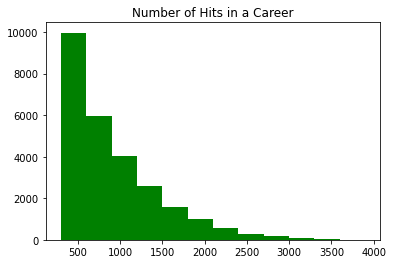

In [ ]:
#Histogram of Number of Hits in a Career
bin_list = []
data = cumlative_batting['Hits']
for number in range(1,14):
  item = number * 300
  bin_list.append(item)
plt.pyplot.title('Number of Hits in a Career')
plt.pyplot.hist(x = data,bins = bin_list,color = 'green')

(array([8.7675e+04, 4.9860e+03, 1.8130e+03, 9.2000e+02, 4.1900e+02,
        1.8500e+02, 1.0500e+02, 4.9000e+01, 1.9000e+01, 1.2000e+01]),
 array([  0. ,  76.2, 152.4, 228.6, 304.8, 381. , 457.2, 533.4, 609.6,
        685.8, 762. ]),
 <a list of 10 Patch objects>)

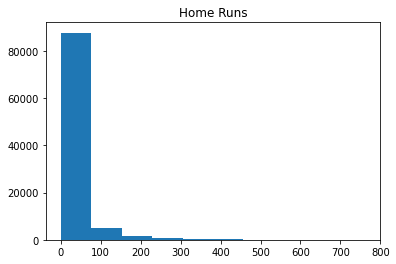

In [ ]:
#Histogram of Number of Homeruns in a Career
plt.pyplot.title('Home Runs')
plt.pyplot.hist(x= cumlative_batting['Home Runs'])

(array([7.2338e+04, 9.4180e+03, 3.6600e+03, 1.6350e+03, 7.7400e+02,
        3.4600e+02, 1.1900e+02, 3.5000e+01, 1.0000e+01, 1.0000e+01]),
 array([   0. ,  259.7,  519.4,  779.1, 1038.8, 1298.5, 1558.2, 1817.9,
        2077.6, 2337.3, 2597. ]),
 <a list of 10 Patch objects>)

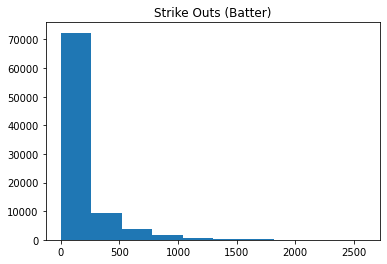

In [ ]:
#Histogram of Number of Strikeouts in a Career
plt.pyplot.title('Strike Outs (Batter)')
plt.pyplot.hist(x= cumlative_batting['Strike Outs'])

(array([3.601e+04, 5.678e+03, 1.665e+03, 4.910e+02, 1.760e+02, 6.600e+01,
        2.900e+01, 1.300e+01, 7.000e+00, 4.000e+00]),
 array([   0. ,  571.4, 1142.8, 1714.2, 2285.6, 2857. , 3428.4, 3999.8,
        4571.2, 5142.6, 5714. ]),
 <a list of 10 Patch objects>)

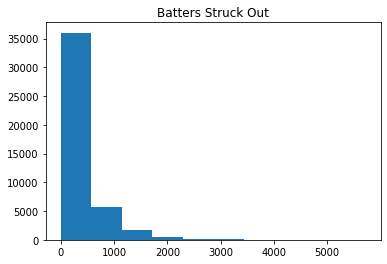

In [ ]:
#Histogram of Number of Batters Struckout in a Career
plt.pyplot.title('Batters Struck Out')
plt.pyplot.hist(x= cumlative_pitching['Batters Struck Out'])

(array([5.6929e+04, 9.4650e+03, 4.9120e+03, 2.5410e+03, 9.7000e+02,
        5.2200e+02, 2.7200e+02, 1.5200e+02, 6.9000e+01, 1.7000e+01]),
 array([   0. ,  571.2, 1142.4, 1713.6, 2284.8, 2856. , 3427.2, 3998.4,
        4569.6, 5140.8, 5712. ]),
 <a list of 10 Patch objects>)

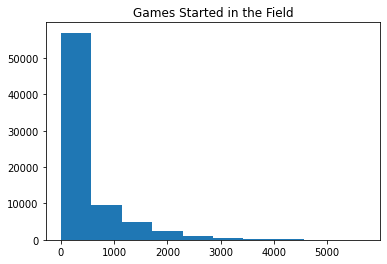

In [ ]:
#Histogram of Number of Games Started in the Field in a Career
plt.pyplot.title('Games Started in the Field')
plt.pyplot.hist(x= cumlative_fielding['Games Started(Fielding)'])

(array([3.5542e+04, 5.8850e+03, 1.6570e+03, 5.3500e+02, 2.0500e+02,
        9.9000e+01, 4.0000e+01, 2.4000e+01, 1.1000e+01, 8.0000e+00]),
 array([  0. ,  27.7,  55.4,  83.1, 110.8, 138.5, 166.2, 193.9, 221.6,
        249.3, 277. ]),
 <a list of 10 Patch objects>)

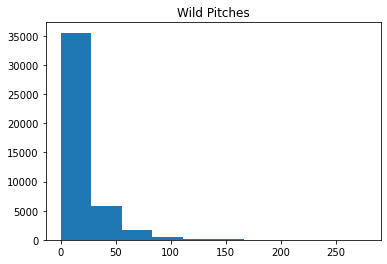

In [ ]:
#Histogram of Number of Wild Pitches in a Career
plt.pyplot.title('Wild Pitches')
plt.pyplot.hist(x= cumlative_pitching['Wild Pitch(pitcher)'])

(array([3.884e+03, 1.052e+03, 5.160e+02, 2.780e+02, 1.430e+02, 7.100e+01,
        4.300e+01, 2.300e+01, 1.100e+01, 3.000e+00]),
 array([   0. ,  149.8,  299.6,  449.4,  599.2,  749. ,  898.8, 1048.6,
        1198.4, 1348.2, 1498. ]),
 <a list of 10 Patch objects>)

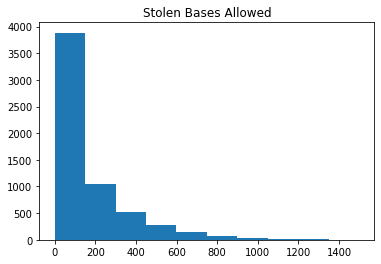

In [ ]:
#Histogram of Number of Bases Stolen Allowed in a Career
plt.pyplot.title('Stolen Bases Allowed')
plt.pyplot.hist(x= cumlative_fielding['Stolen Bases Allowed'])

##Pie Chart

(-1.1180010635214828,
 1.1071237046790696,
 -1.1161805388583534,
 1.1007705018503977)

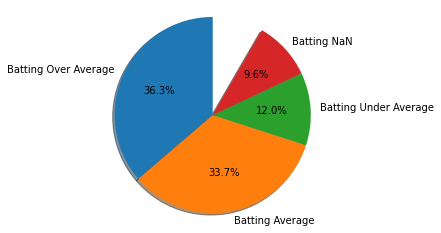

In [ ]:
#This needs further investigation
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Batting Over Average','Batting Average','Batting Under Average','Batting NaN'
sizes = [len(cumlative_batting.query('Hits/AB > 0.250'))/len(cumlative_batting),len(cumlative_batting.query('0.250 >= Hits/AB >= 0.150 '))/len(cumlative_batting),len(cumlative_batting.query('Hits < 0.150'))/len(cumlative_batting),len(cumlative_batting.query('Hits/AB != Hits/AB'))/len(cumlative_batting)]


fig1, ax1 = plt.pyplot.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')


##Scatter Plots and 2D Histograms

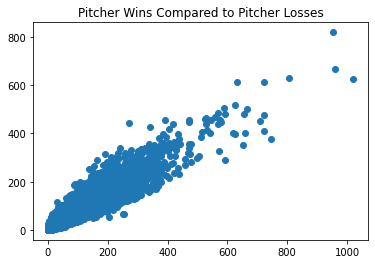

In [ ]:
#Scatterplot of Pitcher Wins Comapred to Pitcher Losses
plt.pyplot.title('Pitcher Wins Compared to Pitcher Losses')
plt.pyplot.scatter(x=mergeData.query('W>0')['W'],y=mergeData.query('W>0')['L'])

Text(0, 0.5, 'Pitcher Losses')

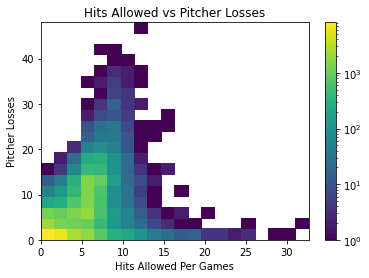

In [ ]:
#2D Histogram of Hits Allowed Compared to Pitcher Losses
plt.pyplot.title('Hits Allowed vs Pitcher Losses')
plt.pyplot.hist2d(x=pitching['Hits_Allowed']/pitching['G(pitching)'],y=pitching['L'],bins = 20,norm = plt.colors.LogNorm())
plt.pyplot.colorbar()
plt.pyplot.xlabel('Hits Allowed Per Games')
plt.pyplot.ylabel('Pitcher Losses')

Text(0, 0.5, 'Pitcher Wins')

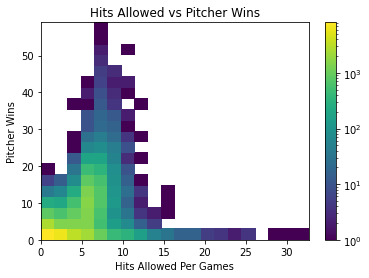

In [ ]:
#2D Histogram of Hits Allowed Compared to Pitcher Wins
plt.pyplot.title('Hits Allowed vs Pitcher Wins')
plt.pyplot.hist2d(x=pitching['Hits_Allowed']/pitching['G(pitching)'],y=pitching['W'],bins = 20,norm = plt.colors.LogNorm())
plt.pyplot.colorbar()
plt.pyplot.xlabel('Hits Allowed Per Games')
plt.pyplot.ylabel('Pitcher Wins')

In [ ]:
#Corrilaton Matrix
mergeData.corr()

,AB,2B,3B,RBI,Caught_Stealing(batter),G(batting),R(batting),Hits,Home Runs,Bases Stolen,...,Batters Hit,Sacrifice Flies Allowed,Sacrifice Hits Allowed,Ground out into Double Play(pitcher),Games Started(Pitching),Wild Pitch(pitcher),ERA,inducted_0,inducted_N,inducted_Y
AB,1.000000,0.974030,0.830133,0.956682,0.707765,0.964124,0.976599,0.994465,0.781473,0.688203,...,-0.124603,-0.089879,-0.079172,-0.027718,-0.095568,-0.119319,-0.224884,0.114005,-0.109394,-0.030849
2B,0.974030,1.000000,0.805017,0.968225,0.687102,0.933642,0.967725,0.981541,0.815880,0.640844,...,-0.146245,-0.089192,-0.080509,-0.026355,-0.125062,-0.141763,-0.219015,0.102163,-0.098056,-0.027559
3B,0.830133,0.805017,1.000000,0.785867,0.544908,0.774084,0.857159,0.850319,0.491695,0.740084,...,-0.121731,-0.084184,-0.077475,-0.024067,-0.104276,-0.113529,-0.188330,0.089115,-0.085587,-0.023852
RBI,0.956682,0.968225,0.785867,1.000000,0.620894,0.918401,0.959450,0.963967,0.885881,0.599042,...,-0.137994,-0.087633,-0.079425,-0.025809,-0.116372,-0.132858,-0.210919,0.098491,-0.094604,-0.026322
Caught_Stealing(batter),0.707765,0.687102,0.544908,0.620894,1.000000,0.687031,0.695405,0.702152,0.548152,0.698182,...,-0.129429,-0.068361,-0.063161,-0.019313,-0.119932,-0.129315,-0.169407,0.073057,-0.070230,-0.019328
G(batting),0.964124,0.933642,0.774084,0.918401,0.687031,1.000000,0.929312,0.951814,0.759791,0.638876,...,0.011162,-0.003804,0.001648,-0.015089,0.011189,0.020158,-0.169356,0.141369,-0.135645,-0.038274
R(batting),0.976599,0.967725,0.857159,0.959450,0.695405,0.929312,1.000000,0.985155,0.796635,0.737977,...,-0.143096,-0.091237,-0.082907,-0.026726,-0.120906,-0.135917,-0.216396,0.102497,-0.098434,-0.027455
Hits,0.994465,0.981541,0.850319,0.963967,0.702152,0.951814,0.985155,1.000000,0.781365,0.696638,...,-0.142739,-0.092625,-0.083542,-0.027516,-0.118816,-0.137635,-0.223767,0.106995,-0.102680,-0.028910
Home Runs,0.781473,0.815880,0.491695,0.885881,0.548152,0.759791,0.796635,0.781365,1.000000,0.384584,...,-0.123770,-0.068110,-0.062400,-0.019560,-0.112130,-0.121753,-0.168019,0.073136,-0.070368,-0.019137
Bases Stolen,0.688203,0.640844,0.740084,0.599042,0.698182,0.638876,0.737977,0.696638,0.384584,1.000000,...,-0.112406,-0.065519,-0.060609,-0.018545,-0.103976,-0.108356,-0.152957,0.069748,-0.066920,-0.018900


<Figure size 6000x6000 with 0 Axes>

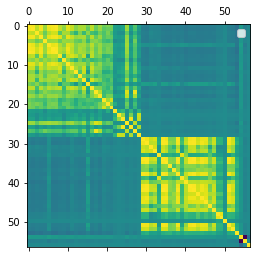

In [ ]:
#Corrilation Heat Map of Merge Data
plt.pyplot.figure(figsize=(30,30), dpi= 200, facecolor='w', edgecolor='k')
plt.pyplot.matshow(mergeData.corr())
plt.pyplot.legend()
plt.pyplot.savefig('/content/drive/MyDrive/archive (1)/corrilation.png',dpi=300)

# Machine Learning

In [ ]:
mergeData.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 97993 entries, ('aardsda01', 2004) to ('zychto01', 2015)
Data columns (total 57 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   AB                                    97993 non-null  float64
 1   2B                                    97993 non-null  float64
 2   3B                                    97993 non-null  float64
 3   RBI                                   97993 non-null  float64
 4   Caught_Stealing(batter)               97993 non-null  float64
 5   G(batting)                            97993 non-null  float64
 6   R(batting)                            97993 non-null  float64
 7   Hits                                  97993 non-null  float64
 8   Home Runs                             97993 non-null  float64
 9   Bases Stolen                          97993 non-null  float64
 10  Walked                                97993 non-nul

In [ ]:
#Before SMOTE
mergeData['inducted_Y'].value_counts()

0    97681
1      312
Name: inducted_Y, dtype: int64

In [ ]:
#Split Data
X_data = mergeData.iloc[:,:-3]
y_data = mergeData['inducted_Y']
#Default split is 75% training 25% testing
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,train_size = 0.7)
# creating synthetic data points to balence the training data
oversampler = SMOTE(k_neighbors = 5)
X_train , y_train = oversampler.fit_resample(X_train,y_train)

In [ ]:
#Double Check X_data Columns
print(X_data.columns)

Index(['AB', '2B', '3B', 'RBI', 'Caught_Stealing(batter)', 'G(batting)',
       'R(batting)', 'Hits', 'Home Runs', 'Bases Stolen', 'Walked',
       'Strike Outs', 'Walked(intentionally)', 'Hit by Pitch', 'Sacrifice Fly',
       'Sacrifice Hit', 'Ground out into Double Play', 'InnOuts', 'PO', 'A',
       'E', 'DP', 'PB', 'ZR', 'Runners_Caught_Stealing(fielder)',
       'G(fielding)', 'Stolen Bases Allowed', 'Games Started(Fielding)',
       'Wild Pitch(fielding)', 'W', 'L', 'CG', 'SHO', 'SV', 'IPouts', 'ER',
       'BAOpp', 'BK', 'BFP', 'GF', 'G(pitching)', 'R(pitching)',
       'Hits_Allowed', 'Home Runes Allowed', 'Walks Allowed',
       'Batters Struck Out', 'Walks Allowed (intentionally)', 'Batters Hit',
       'Sacrifice Flies Allowed', 'Sacrifice Hits Allowed',
       'Ground out into Double Play(pitcher)', 'Games Started(Pitching)',
       'Wild Pitch(pitcher)', 'ERA'],
      dtype='object')


In [ ]:
#After SMOTE
y_train.value_counts()

0    68366
1    68366
Name: inducted_Y, dtype: int64

##RandomizedSearchCV

In [ ]:
kfold = KFold(n_splits=10, shuffle = True)

In [ ]:
#Takes too long to be effective
model = XGBClassifier(objective= 'reg:tweedie')
params = {'max_depth':[2,3,4,5,6,7,8],'n_estimators':[50,100,200,400],'eta':[0.1,0.2,0.4,0.5,0.8]}
random_cl = RandomizedSearchCV(model,params,scoring= 'accuracy',cv=kfold,)
random_cl.fit(X_train,y_train)
#Shows the best parameters
best_params = random_cl.best_params_
# Shows best score
scores = random_cl.best_score_
print(best_params)
print(scores)


{'n_estimators': 400, 'max_depth': 3, 'eta': 0.4}
0.9806716214254143


## Machine Learning Models

In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
LogisticRegression_F1Score = f1_score(y_test,y_pred)
LogisticRegression_ROCscore = roc_auc_score(y_test,y_pred)
print(LogisticRegression_F1Score)
print(LogisticRegression_ROCscore)

0.9606095652765494
0.9876543209876543
28160 1157 1 80
0.12139605462822459
0.974094582126327


In [ ]:
#KNeighbors Classifier
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
KNeighborsClassifier_F1Score = f1_score(y_test,y_pred)
KNeighborsClassifier_ROCscore = roc_auc_score(y_test,y_pred)
print(KNeighborsClassifier_F1Score)
print(KNeighborsClassifier_ROCscore)

0.9606095652765494
0.9876543209876543
28160 1157 1 80
0.12139605462822459
0.974094582126327


In [ ]:
#Decision Tree Classifier
model3 = DecisionTreeClassifier(max_depth= None,min_samples_leaf = 7,min_samples_split= 2,min_weight_fraction_leaf=0.2,)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
DecisionTreeClassifier_F1Score = f1_score(y_test,y_pred)
DecisionTreeClassifier_ROCscore = roc_auc_score(y_test,y_pred)
print(DecisionTreeClassifier_F1Score)
print(DecisionTreeClassifier_ROCscore)

0.9606095652765494
0.9876543209876543
28160 1157 1 80
0.12139605462822459
0.974094582126327


In [ ]:
#Random Forest Classifier
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
RandomForestClassifier_F1Score = f1_score(y_test,y_pred)
RandomForestClassifier_ROCscore = roc_auc_score(y_test,y_pred)
print(RandomForestClassifier_F1Score)
print(RandomForestClassifier_ROCscore)

0.9606095652765494
0.9876543209876543
28160 1157 1 80
0.12139605462822459
0.974094582126327


In [ ]:
#XGB Classifier
model6 = XGBClassifier(max_depth = 3,n_estimators = 400, eta = 0.4)
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
results_df = pd.DataFrame()
results_df['true'] = y_test.copy(deep = True)
results_df['prediction'] = copy.deepcopy(y_pred)
false_over_predictions = sum(results_df.groupby('playerID').sum().query('true == 1 and prediction > 1')['prediction'])
true_over_predictions = sum(results_df.groupby('playerID').sum().query('true == 1 and prediction > 1')['true'])
print(false_over_predictions - true_over_predictions)
XGBClassifier_F1Score = f1_score(y_test,y_pred)
XGBClassifier_ROCscore = roc_auc_score(y_test,y_pred)
print(XGBClassifier_F1Score)
print(XGBClassifier_ROCscore)

0.9606095652765494
0.9876543209876543
28160 1157 1 80
28160 1157 1 80
96
0.12139605462822459
0.974094582126327


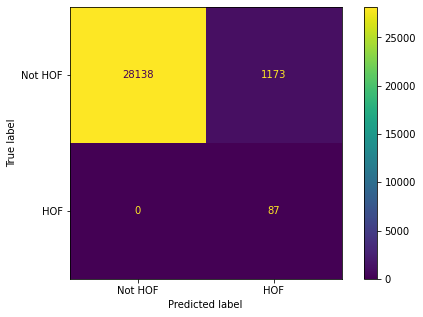

In [ ]:
#Plotting the Comfusion Matrix
fig,ax = plt.pyplot.subplots(figsize = (8,5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels = ['Not HOF', 'HOF'])
cmp.plot(ax = ax)
plt.pyplot.savefig('/content/drive/MyDrive/archive (1)/confusion_matrix_heatmap.png',dpi=300)
plt.pyplot.show()

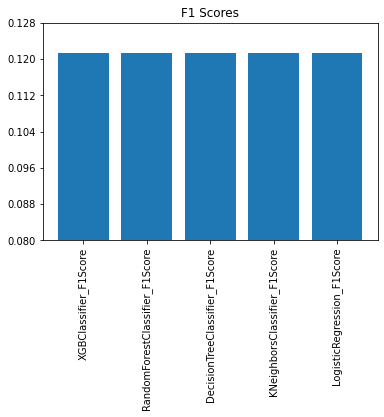

In [ ]:
plt.pyplot.title('F1 Scores')
plt.pyplot.xticks(rotation='vertical')
plt.pyplot.bar(x=['XGBClassifier_F1Score','RandomForestClassifier_F1Score','DecisionTreeClassifier_F1Score','KNeighborsClassifier_F1Score','LogisticRegression_F1Score'],
               height =np.array([XGBClassifier_F1Score,RandomForestClassifier_F1Score,DecisionTreeClassifier_F1Score,KNeighborsClassifier_F1Score,LogisticRegression_F1Score])-0.08, bottom =0.08 )
plt.pyplot.yticks(np.arange(0.08,0.13,step = 0.008))
plt.pyplot.savefig('/content/drive/MyDrive/archive (1)/F1_scores.png',dpi=300)
plt.pyplot.show()

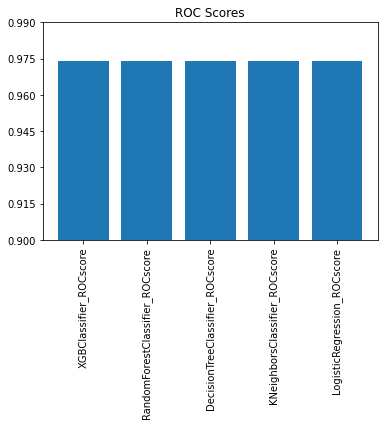

In [ ]:
plt.pyplot.title('ROC Scores')
plt.pyplot.xticks(rotation='vertical')
plt.pyplot.bar(x=['XGBClassifier_ROCscore','RandomForestClassifier_ROCscore','DecisionTreeClassifier_ROCscore','KNeighborsClassifier_ROCscore','LogisticRegression_ROCscore'],
               height =np.array([XGBClassifier_ROCscore, RandomForestClassifier_ROCscore,DecisionTreeClassifier_ROCscore,KNeighborsClassifier_ROCscore,LogisticRegression_ROCscore])-0.9,bottom = 0.9)
plt.pyplot.yticks(np.arange(0.9,1,step = 0.015))
plt.pyplot.savefig('/content/drive/MyDrive/archive (1)/ROC_score.png',dpi=300)
plt.pyplot.show()

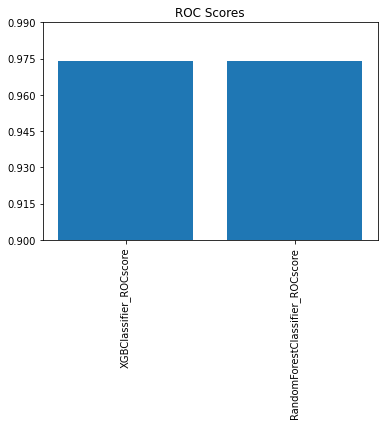

In [ ]:
plt.pyplot.title('ROC Scores')
plt.pyplot.xticks(rotation='vertical')
plt.pyplot.bar(x=['XGBClassifier_ROCscore','RandomForestClassifier_ROCscore'],
               height =np.array([XGBClassifier_ROCscore, RandomForestClassifier_ROCscore])-0.9,bottom = 0.9)
plt.pyplot.yticks(np.arange(0.9,1,step = 0.015))
plt.pyplot.savefig('/content/drive/MyDrive/archive (1)/ROC_comparasion.png',dpi=300)
plt.pyplot.show()

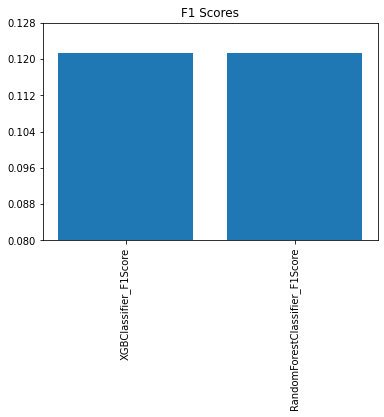

In [ ]:
plt.pyplot.title('F1 Scores')
plt.pyplot.xticks(rotation='vertical')
plt.pyplot.bar(x=['XGBClassifier_F1Score','RandomForestClassifier_F1Score'],
               height =np.array([XGBClassifier_F1Score,RandomForestClassifier_F1Score])-0.08, bottom =0.08 )
plt.pyplot.yticks(np.arange(0.08,0.13,step = 0.008))
plt.pyplot.savefig('/content/drive/MyDrive/archive (1)/F1_comparasion.png',dpi=300)
plt.pyplot.show()

## Nerual Networks

In [ ]:
# Setting up the model
sample_optimizer = keras.optimizers.Adam(learning_rate=0.01)
early_stopping_condition = keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=15) # Stop the ML training after (patience) number of epochs without improvement
plateau_monitor = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='auto', patience=5, factor=0.3, min_lr=0.00000001,min_delta = 0.000001) # Adjusts the learning rate of the ML after (patience) number of epochs without improvement
sample_loss = keras.losses.BinaryCrossentropy() # For classifier use BinaryCrossentropy() or CategoricalCrossentropy() for 2 or more classes respectively

num_outputs = 1
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_dim=len(X_train.columns), activation='sigmoid'))
# model.add(keras.layers.Dense(8, activation='sigmoid'))
# model.add(keras.layers.Dense(4, activation='sigmoid'))
model.add(keras.layers.Dense(num_outputs, activation='sigmoid')) # Change to 'sigmoid' for classifier

In [ ]:
# Relu
sample_optimizer = keras.optimizers.Adam(learning_rate=0.01)
early_stopping_condition = keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=15) # Stop the ML training after (patience) number of epochs without improvement
plateau_monitor = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='auto', patience=5, factor=0.3, min_lr=0.00000001,min_delta = 0.000001) # Adjusts the learning rate of the ML after (patience) number of epochs without improvement
sample_loss = keras.losses.BinaryCrossentropy() # For classifier use BinaryCrossentropy() or CategoricalCrossentropy() for 2 or more classes respectively

num_outputs = 1
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_dim=len(X_train.columns), activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(num_outputs, activation='sigmoid')) # Change to 'sigmoid' for classifier

In [ ]:
model.compile(loss=sample_loss, optimizer=sample_optimizer)
history = model.fit(X_train, y_train, epochs=75, callbacks=[early_stopping_condition, plateau_monitor], validation_data=(X_test, y_test))

Epoch 1/75
4274/4274 [==============================] - 9s 2ms/step - loss: 0.2008 - val_loss: 0.1453 - lr: 0.0100
Epoch 2/75
4274/4274 [==============================] - 8s 2ms/step - loss: 0.0980 - val_loss: 0.1347 - lr: 0.0100
Epoch 3/75
4274/4274 [==============================] - 10s 2ms/step - loss: 0.0986 - val_loss: 0.1357 - lr: 0.0100
Epoch 4/75
4274/4274 [==============================] - 8s 2ms/step - loss: 0.0976 - val_loss: 0.1478 - lr: 0.0100
Epoch 5/75
4274/4274 [==============================] - 8s 2ms/step - loss: 0.0976 - val_loss: 0.1262 - lr: 0.0100
Epoch 6/75
4274/4274 [==============================] - 8s 2ms/step - loss: 0.0975 - val_loss: 0.1340 - lr: 0.0100
Epoch 7/75
4274/4274 [==============================] - 8s 2ms/step - loss: 0.0975 - val_loss: 0.1457 - lr: 0.0100
Epoch 8/75
4274/4274 [==============================] - 8s 2ms/step - loss: 0.0975 - val_loss: 0.1224 - lr: 0.0100
Epoch 9/75
4274/4274 [==============================] - 8s 2ms/step - loss: 0.0

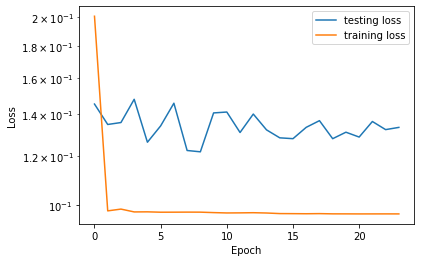

In [ ]:
#Shows loss over number of epochs
plt.pyplot.figure()
plt.pyplot.plot(history.history['val_loss'], label = 'testing loss')
plt.pyplot.plot(history.history['loss'], label = 'training loss')
plt.pyplot.xlabel('Epoch')
plt.pyplot.ylabel('Loss')
plt.pyplot.yscale('log')
plt.pyplot.legend()

In [ ]:
prediction = model.predict(X_test)
rounded_prediction = np.round(prediction)
rounded_prediction = np.round(prediction)
tn, fp, fn, tp = confusion_matrix(y_test,rounded_prediction).ravel()
print(tn, fp, fn, tp)


28159 1151 0 88


In [ ]:
print(X_test.columns)

Index(['AB', '2B', '3B', 'RBI', 'Caught_Stealing(batter)', 'G(batting)',
       'R(batting)', 'Hits', 'Home Runs', 'Bases Stolen', 'Walked',
       'Strike Outs', 'Walked(intentionally)', 'Hit by Pitch', 'Sacrifice Fly',
       'Sacrifice Hit', 'Ground out into Double Play', 'InnOuts', 'PO', 'A',
       'E', 'DP', 'PB', 'ZR', 'Runners_Caught_Stealing(fielder)',
       'G(fielding)', 'Stolen Bases Allowed', 'Games Started(Fielding)',
       'Wild Pitch(fielding)', 'W', 'L', 'CG', 'SHO', 'SV', 'IPouts', 'ER',
       'BAOpp', 'BK', 'BFP', 'GF', 'G(pitching)', 'R(pitching)',
       'Hits_Allowed', 'Home Runes Allowed', 'Walks Allowed',
       'Batters Struck Out', 'Walks Allowed (intentionally)', 'Batters Hit',
       'Sacrifice Flies Allowed', 'Sacrifice Hits Allowed',
       'Ground out into Double Play(pitcher)', 'Games Started(Pitching)',
       'Wild Pitch(pitcher)', 'ERA'],
      dtype='object')


In [ ]:
custom_threshold = 0.96
custom_prediction = abs(np.round(prediction - custom_threshold + 0.5))
tn, fp, fn, tp = confusion_matrix(y_test,custom_prediction).ravel()
print(tn, fp, fn, tp)
# print(np.unique(prediction))
# y_test['prediction'] = custom_prediction
# print(y_test['prediction'])
results_df = pd.DataFrame()
results_df['true'] = y_test.copy(deep = True)
results_df['prediction'] = copy.deepcopy(custom_prediction)
print(results_df.query('true == 1 and prediction == 1').sort_values(by = 'playerID'))
print(results_df.query('true == 0 and prediction == 1').sort_values(by = 'playerID'))
print(results_df.groupby('playerID').sum().query('true == 1 and prediction > 1'))
false_over_predictions = sum(results_df.groupby('playerID').sum().query('true == 1 and prediction > 1')['prediction'])
true_over_predictions = sum(results_df.groupby('playerID').sum().query('true == 1 and prediction > 1')['true'])
print(false_over_predictions - true_over_predictions)

28159 1151 0 88
                  true  prediction
playerID  yearID                  
alexape01 1938       1         1.0
alomaro01 2011       1         1.0
alstowa01 1983       1         1.0
andersp01 2000       1         1.0
aparilu01 1984       1         1.0
...                ...         ...
whiteso99 2006       1         1.0
willidi02 2008       1         1.0
willite01 1966       1         1.0
willivi01 1995       1         1.0
youngro01 1972       1         1.0

[88 rows x 2 columns]
                  true  prediction
playerID  yearID                  
adamsba01 1937       0         1.0
          1939       0         1.0
alexape01 1936       0         1.0
allendi01 1985       0         1.0
          1987       0         1.0
...                ...         ...
youngro01 1947       0         1.0
          1939       0         1.0
          1936       0         1.0
zimmech01 1938       0         1.0
ziskri01  1989       0         1.0

[1151 rows x 2 columns]
           true  predictio

In [ ]:
sklearn.metrics.mean_absolute_error(y_test, prediction)

0.04234945